In [126]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.dirname(os.path.abspath(os.getcwd()))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
from src.data_processing.resultMetaUtils import frameFromResultMeta

In [129]:
# Create the datatframe from the results meta
df = frameFromResultMeta()
cols = ['meta.ticker', 'meta.numEpoch', 'meta.lookForwardHorizon', 'meta.rowLim', 'accuracy', 'meta.representation', 'meta.model']
df = df[cols]
display(df)

,meta.ticker,meta.numEpoch,meta.lookForwardHorizon,meta.rowLim,accuracy,meta.representation,meta.model
0,AAPL,5,20,1000000,0.473970,orderbooks,deepLOB_TF
1,AMZN,1,20,1000000,0.547650,NaN,deepLOB_PT
2,AMZN,5,20,1000000,0.601400,orderflows,deepLOB_TF
3,AMZN,5,50,1000000,0.600405,orderflows,deepLOB_TF
4,NFLX,5,200,1000000,0.556633,orderflows,deepLOB_TF
...,...,...,...,...,...,...,...
79,AAPL,1,20,40000,0.497875,NaN,deepLOB_PT
80,AMZN,1,50,1000000,0.547650,NaN,deepLOB_PT
81,NFLX,5,5,100000,0.448250,orderflows,deepLOB_TF
82,NFLX,5,200,1000000,0.343392,orderbooks,deepLOB_TF


In [130]:
orderbook = df

# Conditions for orderbooks training
conditions = {
    'meta.rowLim': 1000000,
    'meta.numEpoch': 5,
    'meta.representation': 'orderbooks',
    'meta.model': 'deepLOB_TF'
}

for condition, value in conditions.items():
    orderbook = orderbook[orderbook[condition] == value]

tickers = orderbook['meta.ticker'].unique()

orderbooks = []
for ticker in tickers:
    orderbooks.append(
        orderbook.loc[orderbook['meta.ticker'] == ticker].sort_values('meta.lookForwardHorizon')
    )
    

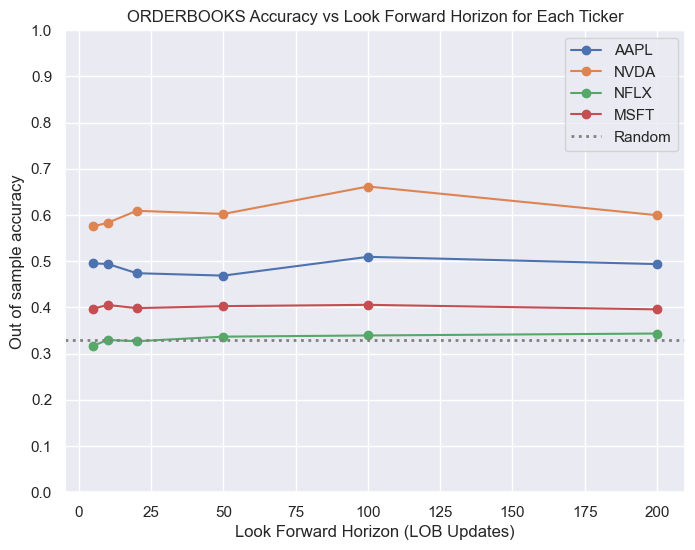

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set()
for d in orderbooks:
    d_sorted = d.sort_values('meta.lookForwardHorizon')
    ax.plot(
        d_sorted['meta.lookForwardHorizon'],
        d_sorted['accuracy'],
        marker='o',
        label=d_sorted['meta.ticker'].iloc[0]
    )
ax.set_xlabel('Look Forward Horizon (LOB Updates)')
ax.set_ylabel('Out of sample accuracy')
ax.set_ylim(0,1)
ax.set_title('ORDERBOOKS Accuracy vs Look Forward Horizon for Each Ticker')
ax.set_yticks([round(y, 1) for y in list(np.arange(0.0, 1.01, 0.1))])
ax.axhline(0.33, color='gray', linestyle=':', linewidth=2, label='Random')
ax.legend()
# ax.set_aspect('equal', adjustable='datalim')
plt.show()

In [132]:
orderflow = df

# Conditions for orderbooks training
conditions = {
    'meta.rowLim': 1000000,
    'meta.numEpoch': 5,
    'meta.representation': 'orderflows',
}

for condition, value in conditions.items():
    orderflow = orderflow[orderflow[condition] == value]

tickers = orderflow['meta.ticker'].unique()

orderflows = []
for ticker in tickers:
    orderflows.append(
        orderflow.loc[orderflow['meta.ticker'] == ticker].sort_values('meta.lookForwardHorizon')
    )
    
display(orderflow)

,meta.ticker,meta.numEpoch,meta.lookForwardHorizon,meta.rowLim,accuracy,meta.representation,meta.model
2,AMZN,5,20,1000000,0.601400,orderflows,deepLOB_TF
3,AMZN,5,50,1000000,0.600405,orderflows,deepLOB_TF
4,NFLX,5,200,1000000,0.556633,orderflows,deepLOB_TF
10,NVDA,5,10,1000000,0.686160,orderflows,deepLOB_TF
15,NFLX,5,100,1000000,0.514542,orderflows,deepLOB_TF
17,NFLX,5,20,1000000,0.551353,orderflows,deepLOB_TF
19,NVDA,5,50,1000000,0.686505,orderflows,deepLOB_TF
24,NFLX,5,5,1000000,0.565761,orderflows,deepLOB_TF
31,NVDA,5,200,1000000,0.686435,orderflows,deepLOB_TF
34,NVDA,5,20,1000000,0.686505,orderflows,deepLOB_TF


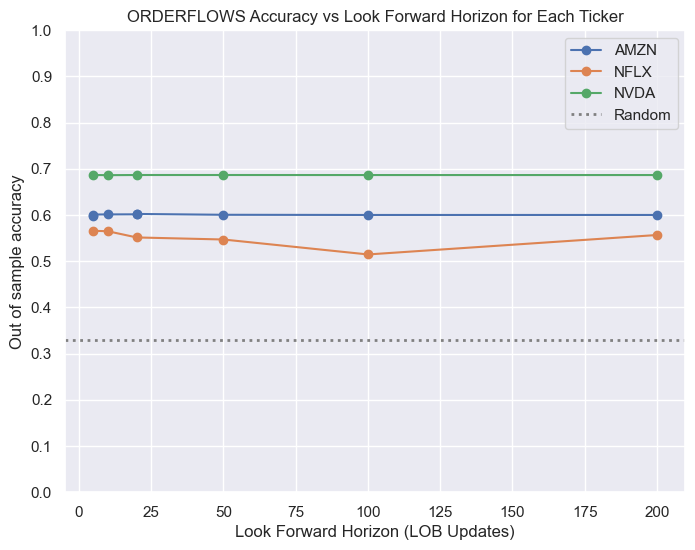

In [133]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set()
for d in orderflows:
    d_sorted = d.sort_values('meta.lookForwardHorizon')
    ax.plot(
        d_sorted['meta.lookForwardHorizon'],
        d_sorted['accuracy'],
        marker='o',
        label=d_sorted['meta.ticker'].iloc[0]
    )
ax.set_xlabel('Look Forward Horizon (LOB Updates)')
ax.set_ylabel('Out of sample accuracy')
ax.set_ylim(0,1)
ax.set_title('ORDERFLOWS Accuracy vs Look Forward Horizon for Each Ticker')
ax.set_yticks([round(y, 1) for y in list(np.arange(0.0, 1.01, 0.1))])
ax.axhline(0.33, color='gray', linestyle=':', linewidth=2, label='Random')
ax.legend()
# ax.set_aspect('equal', adjustable='datalim')
plt.show()